<a href="https://colab.research.google.com/github/riamsnow/FutureMakers/blob/main/Day11_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [2]:
# Load train and test dataset

def load_dataset():
  (trainX, trainY), (testX, testY) = mnist.load_data()
  trainX = trainX.reshape((-1, 28, 28, 1))
  testX = testX.reshape((-1, 28, 28, 1)) 
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY 
  # (60,000, 28, 28) -> original shape
  # (60,000, 28, 28, 1) -> original shape

  # (0,1,2,3,4,5,6,7,8,9) -> original labels


In [3]:
#Standardization (scaling the features/pixels)

def prep_pixels(train,test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm/255.0
  test_norm = test_norm/255.0
  return train_norm, test_norm

In [4]:
#Define the architecture
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation = 'relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation = 'softmax'))

  #compile the model
  opt = SGD(learning_rate = 0.01, momentum = 0.9)
  model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model


In [5]:
# Evaluate the model using K-fold CV

def evaluate_model(dataX, dataY, n_folds =5):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    model = define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix],dataX[test_ix], dataY[test_ix] 
    history = model.fit(trainX, trainY, epochs = 10, batch_size =32, validation_data=(testX,testY), verbose = 0)
    _, acc = model.evaluate(testX, testY, verbose = 0) #[0.2, 0.6]
    print('> %0.3f'% (acc*100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [6]:
# Plot the curves

def summarize_diagnostics(histories):
  for i in range(len(histories)):
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label = 'train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label = 'test')
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(histories[i].history['val_accuracy'], color = 'orange', label = 'test')
  pyplot.show()

In [7]:
#Summarize model performance
def summarize_performance(scores):
  print('Accuracy: mean=%0.3f, std=%0.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  pyplot.boxplot(scores)
  pyplot.show()

In [8]:
# Run the test harness for evaluating model

def run_test_harness():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  scores, histories = evaluate_model(trainX, trainY)
  summarize_diagnostics(histories)
  summarize_performance(scores)


> 98.467
> 98.633
> 98.600
> 98.817
> 98.592


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


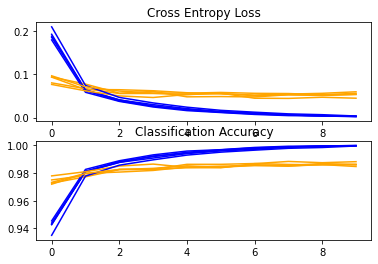

Accuracy: mean=98.622, std=0.113, n=5


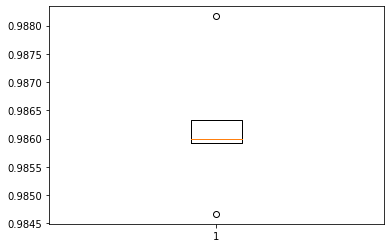

In [9]:
# Run the test harness function
run_test_harness()